# Importieren von Bibliotheken

In [95]:
#reset -fs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf 
from sklearn import preprocessing
np.set_printoptions(suppress=True)
import folium
import geopandas as gpd
%matplotlib inline

# Daten Hochladen und verknüpfen mit der geo_Daten von US Zip Code Latitude and Longitude

In [96]:
data_ = pd.read_csv('King_County_House_prices_dataset.csv')
state_geo='/Users/younesiferd/Desktop/data/us-zip-code-latitude-and-longitude.geojson'
geo_data= gpd.read_file(state_geo)[["zip","city"]]

geo_data.rename(columns = {'zip':'zipcode'}, inplace = True)
geo_data['zipcode']=geo_data['zipcode'].astype('int')

In [97]:
data=pd.merge(data_,geo_data,on='zipcode', how='left')

# Daten aufbereiten

In [98]:
#data['yr_renovated']=data.waterfront.astype('datetime64[ns]')
data['waterfront']=data.waterfront.astype('category')
data['view']=data.view.astype('category')
data['condition']=data.condition.astype('category')
data['grade']=data.grade.astype('category')
def f1(x):
    if x==0:
        return 'No'
    else:
        return 'Yes'
def f2(x):
    if x==0:
        return 'very bad'
    elif x==1:
        return 'bad'
    elif x==2:
        return 'medium'
    elif x==3:
        return 'good'
    elif x==4:
        return "very good"
def f3(x):
    if x==1:
        return 'very bad'
    elif x==2:
        return 'bad'
    elif x==3:
        return 'medium'
    elif x==4:
        return 'good'
    elif x==5:
        return "very good"
    
def f4(x):
    if x==3:
        return 'very bad'
    elif x>3 and x<=6:
        return 'bad'
    elif x>6 and x<=10:
        return 'medium'
    elif x>10:
        return 'good'
data['waterfront_category']=data['waterfront'].apply(f1)
data['view_category']=data['view'].apply(f2)
data['condition_category']=data['condition'].apply(f3)
data['grade_category']=data['grade'].apply(f4)



## count missing in the data

In [99]:
#data_missing= data.isna()
#data_missing.sum()
#data_missing.sum()/len(data)

In [100]:
#data.columns

# Visualisierung

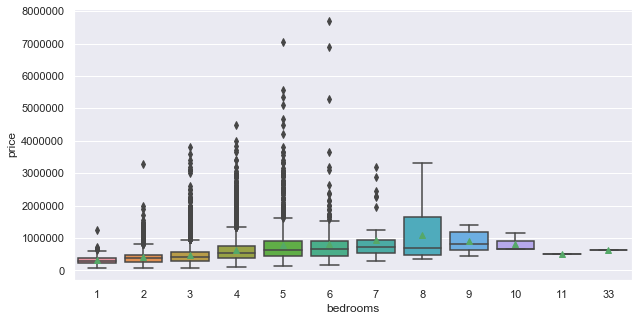

In [101]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='bedrooms', y="price", data=data, showmeans = True)
plt.show()

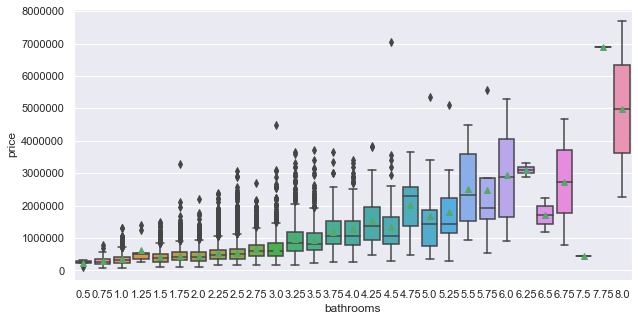

In [102]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='bathrooms', y="price", data=data, showmeans = True)
plt.show()

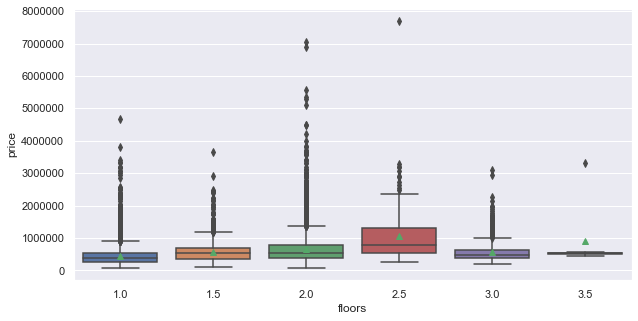

In [103]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='floors', y="price", data=data,  showmeans = True)
plt.show()

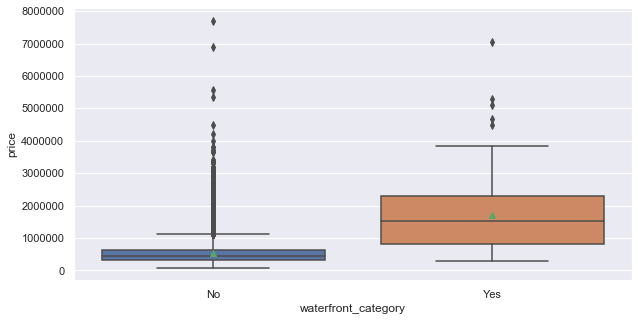

In [104]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='waterfront_category', y="price", data=data,  showmeans = True)
plt.show()

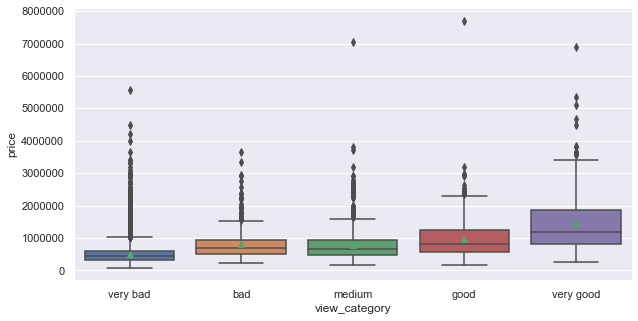

In [105]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='view_category', y="price", data=data, showmeans = True)
#plt.show()

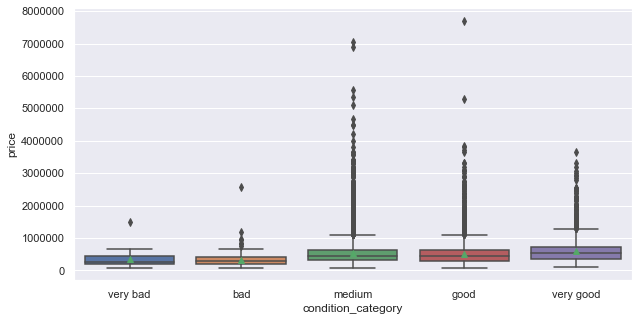

In [106]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='condition_category', y="price", data=data, showmeans = True)
#plt.show()

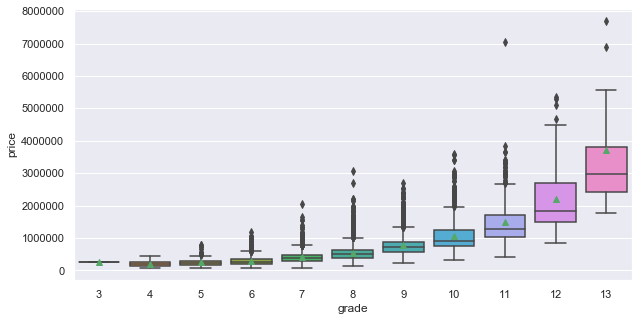

In [107]:
plt.subplots(figsize=(10,5))
sns.boxplot(x='grade', y="price", data=data, showmeans = True)
#plt.show()

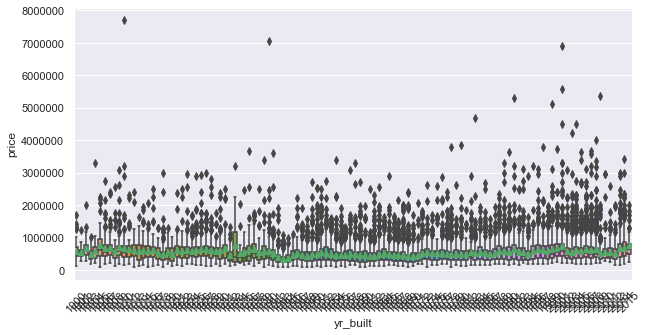

In [108]:
plt.subplots(figsize=(10,5))
chart1=sns.boxplot(x="yr_built", y="price", data=data, showmeans = True)
chart1.set_xticklabels(chart1.get_xticklabels(), rotation=45)
plt.show()

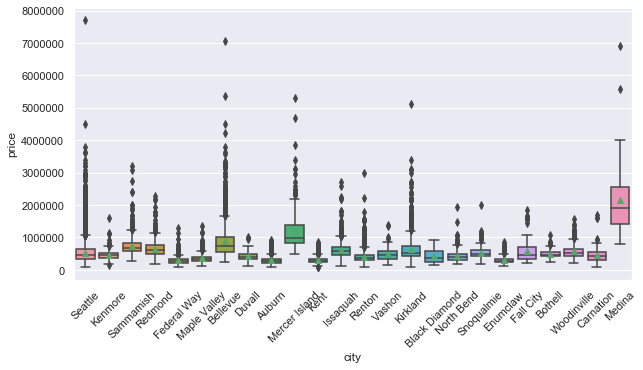

In [109]:
plt.subplots(figsize=(10,5))
chart=sns.boxplot(x='city', y="price", data=data, showmeans = True)
chart.set_xticklabels(chart.get_xticklabels(), rotation=45)
plt.show()

* almost all of the ordinal parameters (bedrooms, bathrooms, floors, views, grade) were also moderately to strongly associated with price
* The prices are particularly high in Medina, since with an average per capita income of USD 81,742 it is considered extremely wealthy.
* Auburn is home to a number of major companies including Northwest Territorial Mint, ZONES, Toysmith, Timberland Homes, POE construction, Armstrong Construction, Miles Sand and Gravel, Oak Harbor Freight Lines


/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


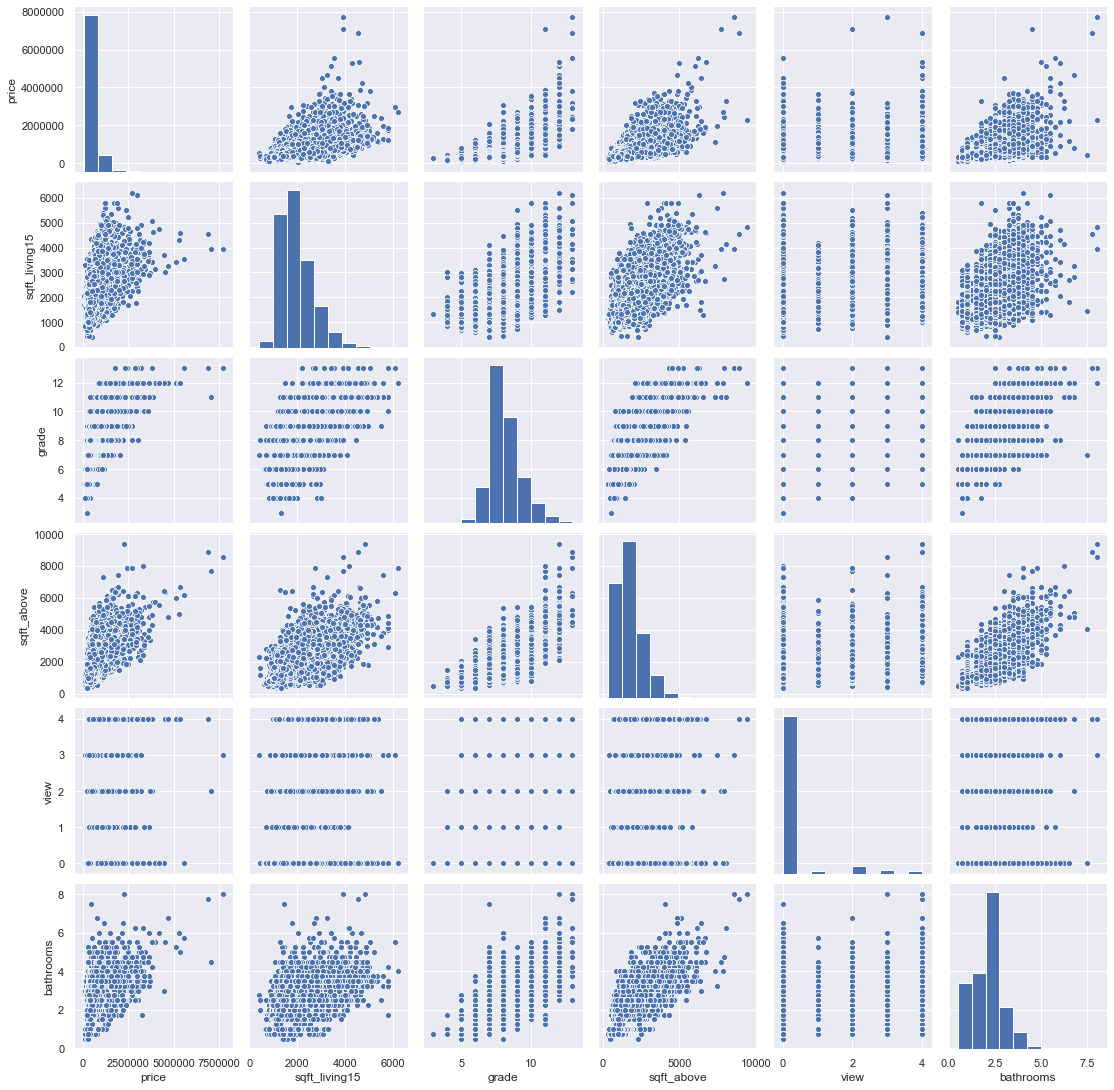

In [110]:
sns.set()
cols = ['price', 'sqft_living15', 'grade', 'sqft_above', 'view', 'bathrooms']
sns.pairplot(data[cols], size = 2.5)
plt.show()

## Prediction of Price by regression analysis

In [111]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

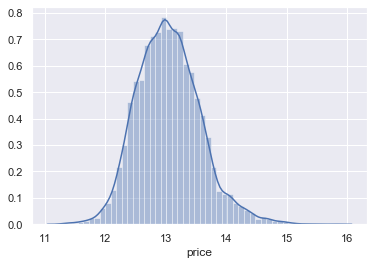

In [112]:
import math
data['sqft_basement']=data['sqft_basement'].replace("?","99999")
data['sqft_basement'] =data['sqft_basement'].astype(float)
data=data.replace(99999,np.nan)
data['sqft_basement'].unique()
data['sqft_basement'] = data['sqft_basement'].astype(float)
data['grade'] = data['grade'].astype(int)
data['price']=np.log(data['price'])
sns.distplot(data['price'], hist=True, kde=True)


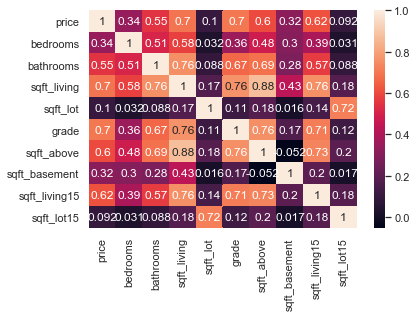

In [141]:
cor_h=data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','view','condition','grade',
            'sqft_above','sqft_basement','sqft_living15','sqft_lot15']]
corrMatrix = cor_h.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [114]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.sandbox.regression.predstd import wls_prediction_std

In [115]:
import statsmodels.formula.api as smf
res=smf.ols(formula='price ~ waterfront+bedrooms+bathrooms+sqft_living+sqft_lot+floors+view+condition+grade+sqft_above+sqft_basement+sqft_living15+sqft_lot15', data=data)
#fit().summary()
#print(res.fit().summary())

In [116]:
# Erstellen von Dummy Variablen:
dummy1=pd.get_dummies(data['waterfront'],prefix='waterfront')
dummy2=pd.get_dummies(data['view'],prefix='view')
dummy3=pd.get_dummies(data['condition'],prefix='condition')
#data['price_ranking'] = pd.qcut(data['price'],labels= ['cheap', 'medium', 'expensive', 'very expensive'] ,q=4)
#dummy4=pd.get_dummies(data['price_ranking'],prefix='towards')


In [117]:
data=pd.concat([data,dummy1,dummy2,dummy3], axis=1)
#data=pd.concat([data,dummy1,dummy2,dummy3,dummy4], axis=1)

In [118]:
#X=data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','yr_renovated','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15','waterfront_1.0','view_0.0','view_2.0','view_3.0','view_4.0','condition_2','condition_3','condition_4','condition_5','towards_medium','towards_expensive','towards_very expensive']]
X=data[['price','bedrooms','bathrooms','sqft_living','sqft_lot','floors','yr_built','yr_renovated','grade','sqft_above','sqft_basement','sqft_living15','sqft_lot15','waterfront_1.0','view_0.0','view_2.0','view_3.0','view_4.0','condition_2','condition_3','condition_4','condition_5','yr_renovated','yr_built']]

In [119]:
X=X[X.replace([np.inf, -np.inf], np.nan).notnull().all(axis=1)] 

In [120]:
X=X.dropna()

In [121]:
y=X[["price"]]

In [122]:
X=X.drop(['price'], axis=1)

In [123]:
X = sm.add_constant(X)

/Users/younesiferd/opt/anaconda3/envs/nf/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [124]:
model = sm.OLS(y, X)
results = model.fit()

In [125]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.656
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     1653.
Date:                Wed, 10 Jun 2020   Prob (F-statistic):               0.00
Time:                        12:26:02   Log-Likelihood:                -4235.9
No. Observations:               17389   AIC:                             8514.
Df Residuals:                   17368   BIC:                             8677.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             21.6345      0.226     95.

In [81]:
influence = results.get_influence()
#c is the distance and p is p-value
#(c, p) = influence.cooks_distance
#plt.stem(np.arange(len(c)), c, markerfmt=",")

In [82]:
#figure1 = sm.graphics.influence_plot(results, size=8)

In [83]:
X = X.drop([ X.index[12764]])
y=y.drop([ y.index[12764]])

## Prediction

In [84]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [85]:
data_x= pd.DataFrame(X)
data_y=pd.DataFrame(y)
data_x=data_x.drop(['const'], axis=1)
X=data_x
y=data_y

In [86]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [87]:
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [88]:
print(regressor.intercept_)

[21.49287714]


In [89]:
print(regressor.coef_)

[[-0.02567025  0.07623613  0.00009786  0.00000018  0.11636067 -0.005465
   0.00000811  0.20303698  0.00000851  0.00008935  0.0001095  -0.0000004
   0.32647861 -0.11475267 -0.04088912 -0.03085548  0.09877156 -0.02496032
   0.15409053  0.17820742  0.24051405  0.00000811]]


In [90]:
y_pred = regressor.predict(X_test)
y_pred=pd.DataFrame(y_pred)
X_test=pd.DataFrame(X_test)


In [91]:
df = pd.concat([y_test, y_pred], axis=1)
df=df.dropna()

In [92]:
pd.set_option('display.max_rows', None)
#display(df)

In [93]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.242221913056523
Mean Squared Error: 0.09233757998744598
Root Mean Squared Error: 0.3038709923428789


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 555 entries, 10 to 3477
Data columns (total 2 columns):
price predicted    555 non-null float64
0                  555 non-null float64
dtypes: float64(2)
memory usage: 13.0 KB


In [139]:
df = df.rename(columns={'price predicted ': 'predicted price'}, index={0: 'actuel price'})


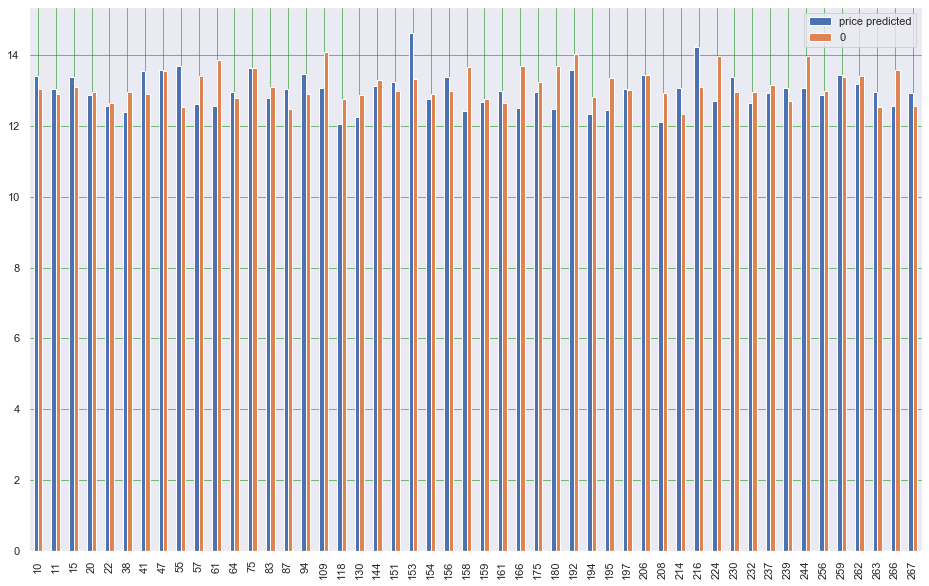

In [140]:
df1 = df.head(50)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()